In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from dcgan_main import *

In [10]:
params = torch.load('CelebA_DCGAN_results/generator_param.pkl')
G=generator()
G.load_state_dict(params)

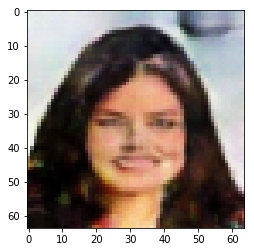

In [147]:
z=torch.randn((1, 100)).view(-1, 100, 1, 1)
img1=G(z)
img1=(img1.cpu().detach().numpy().squeeze().transpose(1,2,0)+1)/2.0
plt.imshow(img1)

In [155]:
z_saved=z.clone()

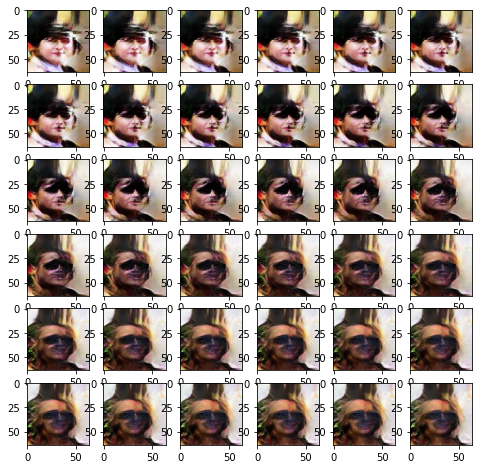

In [154]:
z1=torch.randn((1, 100)).view(-1, 100, 1, 1)
z2=torch.randn((1, 100)).view(-1, 100, 1, 1)

#linear interpolation

fig=plt.figure(figsize=(8, 8))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    rate=i/(columns*rows)
    temp=z1*rate+z2*(1-rate) #z1과 z2 사이를 등분해서 이동
    img=G(temp)
    img=(img.cpu().detach().numpy().squeeze().transpose(1,2,0) +1) /2.0
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()